# **Prueba 3 - Método de la Transformada Inversa**
## **Nombre:** Bryan Sarmiento Basurto
## **Asignatura:** Simulación
## **Fecha:** 29 de junio de 2022

## Librerías y Código General

In [32]:
import math
import random
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from scipy import stats 
from math import log

In [101]:
def get_random_numbers(n=100, seed=1032022):
    numbers = []
    random.seed(seed)
    [numbers.append(random.random())for i in range(n)]
    return numbers

def get_samples(numbers, time):
    samples = []
    for u in numbers:
        up = log(1 - u)
        down = time

        result = -(up / down)
        # result = -0.3 * up
        samples.append(abs(result*10))

    return samples

def generate_dataframe(numbers, samples):
    df = pd.DataFrame()
    df = df.assign(ri=numbers)
    df = df.assign(tiempo_llamada=samples)

    return df

def histogram(x, title, bins = 10):
    plt.hist(x, bins)
    plt.title('Histograma de Distribución: ' + title)
    plt.ylabel('Frecuencia')
    plt.xlabel('Valores')
    plt.show()

def plot_function(x, y, title):
    plt.plot(x, y)
    plt.title(title)
    plt.ylabel('Probabilidad')
    plt.xlabel('Valores')
    plt.show()

def get_pdf(samples, time):
    pdf = []
    for x in samples:
        aux = time * math.exp(-time * x)
        pdf.append(aux)

    return pdf

In [77]:
# Zona de Pruebas
numbers = [0.64, 0.83, 0.03, 0.50, 0.21]

samples = get_samples(
    numbers,
    3
)

df = generate_dataframe(
    numbers,
    samples
)

df.head()

,ri,tiempo_llamada
0,0.64,0.340550
1,0.83,0.590652
2,0.03,0.010153
3,0.50,0.231049
4,0.21,0.078574


## Método de la Transformada Inversa - Continua

### Enunciado

1. Escoger un tipo de función de trasformación inversa, y ponerlo en práctica utilizando Python.

2. En base a la función elegida, desarrollar un ejemplo práctico, que abarque los siguientes puntos:
    * Problema (1 pts)
    * Simulación (2 pts)
    * Gráficas/Resultados (2 pts)

**Consideraciones previas:**
* Se distribuyen las funciones en base al orden de lista.
* Se requiere que la simulación se realice con 100 números de ejemplo.

En base a la lista (21), la función de transformada inversa seleccionada es la **exponencial**. Cuya forma es:

> $- \frac{ln\left ( 1-U \right )}{\lambda }$

Y, cuya forma simplificada, es:

> $- \frac{ln\left ( U \right )}{\lambda }$

### Resolución

#### Problema

**NuvaNet** es un proveedor de servicios de internet y servicios en la nube, que recientemente se ha posicionado en la ciudad de Cuenca.

Los datos que se registran en su Call Center, de Atención al Cliente, determinan una **media de 5 minutos**, la duración de las llamadas con sus clientes, y con un **comportamiento exponencial**.

En base a lo anteriormente descrito, se pide realizar una simulación del comportamiento de las llamadas con 100 datos. Por lo tanto, se deberán generar 100 números pseudoaleatorios, y aplicar la ecuación generadora exponencial.

#### Simulación

In [80]:
# Generación de números pseudoaleatorios
numbers = get_random_numbers()

# Obtención del tiempo de servicio
time = 5
samples = get_samples(
    numbers,
    time
)

# Generación de un dataframe para la visualización
df = generate_dataframe(
    numbers,
    samples
)

df.head()

,ri,tiempo_llamada
0,0.600962,1.837397
1,0.754482,2.808774
2,0.120435,0.256656
3,0.223812,0.506720
4,0.355442,0.878380


In [84]:
df.describe()

,ri,tiempo_llamada
count,100.000000,100.000000
mean,0.437873,1.644122
std,0.268784,2.010502
min,0.006726,0.013497
25%,0.216588,0.488259
50%,0.414734,1.071407
75%,0.645555,2.074474
max,0.999011,13.838234


#### Gráficas/Resultados

##### Gráfica: Función de Densidad de Probabilidad (PDF)

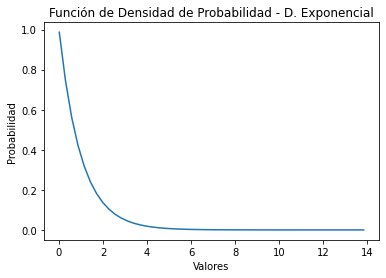

In [99]:
x = np.linspace(
    min(samples),
    max(samples)
)
# x = samples
exp_pdf = stats.expon.pdf(x)
# exp_pdf = get_pdf(x, time)

plot_function(
    x = x,
    y = exp_pdf,
    title = 'Función de Densidad de Probabilidad - D. Exponencial'
)

##### Gráfica: Función de Probabilidad Acumulada (CDF)

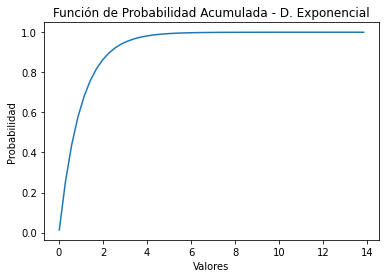

In [103]:
x = np.linspace(
    min(samples),
    max(samples),
    # 100
)

exp_cdf = stats.expon.cdf(x)

plot_function(
    x = x,
    y = exp_cdf,
    title = 'Función de Probabilidad Acumulada - D. Exponencial'
)

##### Gráfica: Histograma

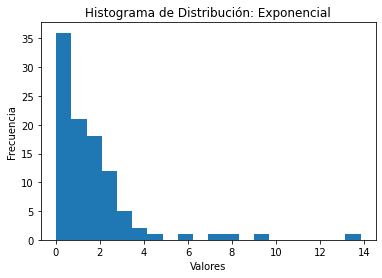

In [52]:
histogram(
    samples,
    title='Exponencial',
    bins = 20
)